### Логистическая регрессия  
#### Цель работы  
Познакомиться с широко используемым методом бинарной классификации - логистической регрессией.  

#### Содержание работы  
Сгенерировать матрицу признаков и вектор целей для задачи классификации с использованием make_classification из библиотеки sklearn.datasets. Число классов возьмите равным двум.  
Реализовать модель логистической регрессии методом градиентного спуска, не используя библиотечные функции.  
Оценить качество построенной модели, используя метрики accuracy и F1-score.  
Реализовать модель логистической регрессии LogisticRegression из библиотеки sklearn.linear_model и оценить качество построенной модели, используя метрики accuracy и F1-score.  
Сравнить результаты двух реализаций.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
from sklearn.datasets import make_classification
X, y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=174)

In [57]:
pd.DataFrame(X).head()

,0,1
0,2.758901,-1.703098
1,2.493985,-0.545435
2,2.868149,-1.490061
3,1.900657,-1.831672
4,-2.225644,-1.572255


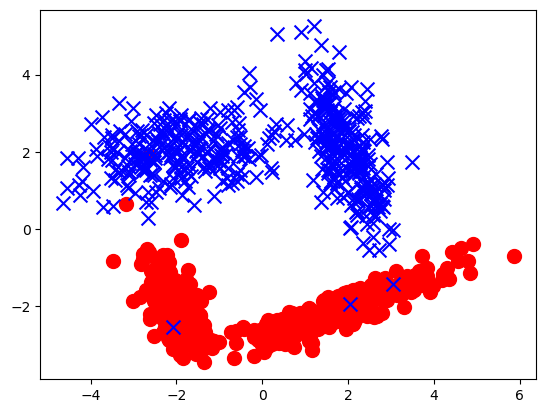

In [58]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()

In [59]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters
    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad
    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b
    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

In [60]:
class LogReg(SGD):
    def sigmoid(self, X, b):        
        return 1. / (1. + np.exp(-X.dot(b)))
    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad  
    def predict_proba(self, X):
        return self.sigmoid(X, self.b)
    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [61]:
logreg = LogReg()

In [62]:
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])


In [63]:
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [64]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')

accuracy = 0.99 F1-score = 0.99


In [65]:
y_pred_proba = logreg.predict_proba(X)

In [74]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01), 
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

In [75]:
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

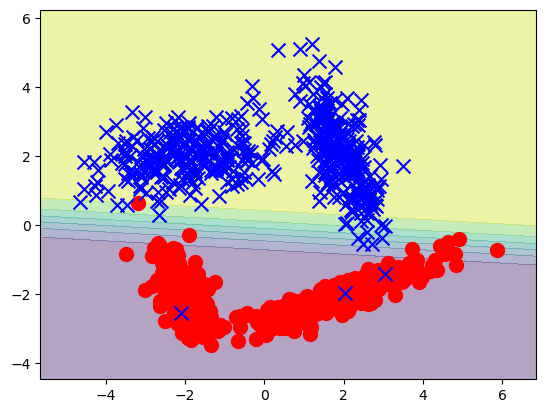

In [76]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)

In [69]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()

In [70]:
model.fit(X, y)
y_pred_lr = model.predict(X)

In [71]:
ac_lr = accuracy_score(y, y_pred_lr)
f1_lr = f1_score(y, y_pred_lr)
print(f'accuracy = {ac_lr:.2f} F1-score = {f1_lr:.2f}')

accuracy = 0.99 F1-score = 0.99


Метрики качеств у двух моделей одинаковы, соответственно, существенной разницы в их работе нет